In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as scipy
import statsmodels.formula.api as smf
import re
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('C:/Users/dianv/OneDrive/Documenten/Indicators.csv') ##Import data as data frame
df2 = pd.DataFrame(df)
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values ##Indicator codes unique

So the data is structured as follows:

In [5]:
df2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
print(Indicators.shape)

(1344, 2)


In [7]:
key_word_dict = {}
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Education'] = ['education','literacy']

In [8]:
feature = 'Education'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            break

In [9]:
df_gdp = df[df['IndicatorCode'] == 'NY.GDP.PCAP.CD']
df_gdp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
95,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
264,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138
377,East Asia & Pacific (developing only),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,89.319639
518,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,924.571393
624,Europe & Central Asia (all income levels),ECS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,648.223441


In [10]:
df_gdp_nl = df_gdp[df['CountryName'] == 'Netherlands']
df_gdp_nl.head()

C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16096,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,1068.784587
41643,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,1159.392357
69515,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,1240.677894
98071,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,1328.036649
126994,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,1541.947365


In [11]:
df_gdp_fin = df_gdp[df['CountryName'] == 'Finland']

df_gdp_deu = df_gdp[df['CountryName'] == 'Germany']

df_gdp_gre = df_gdp[df['CountryName'] == 'Greece']

df_gdp_ita = df_gdp[df['CountryName'] == 'Italy']

df_gdp_spa = df_gdp[df['CountryName'] == 'Spain']

C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [12]:
df_2_NL = pd.DataFrame(df_gdp_nl)

df_2_FIN = pd.DataFrame(df_gdp_fin)

df_2_DEU = pd.DataFrame(df_gdp_deu)

df_2_GRE = pd.DataFrame(df_gdp_gre)

df_2_ITA = pd.DataFrame(df_gdp_ita)

df_2_SPA = pd.DataFrame(df_gdp_spa)

After making the dataframes, we restrict the data to period 1980 - 1984 and 1985 - 1989:

In [14]:
df_3_NL = df_2_NL[df_2_NL['Year'] > 1984]
df_4_NL = df_3_NL[df_3_NL['Year'] < 1990]
df_3_FIN = df_2_FIN[df_2_FIN['Year'] > 1984]
df_4_FIN = df_3_FIN[df_3_FIN['Year'] < 1990]
df_3_DEU = df_2_DEU[df_2_DEU['Year'] > 1984]
df_4_DEU = df_3_DEU[df_3_DEU['Year'] < 1990]
df_3_GRE = df_2_GRE[df_2_GRE['Year'] > 1984]
df_4_GRE = df_3_GRE[df_3_GRE['Year'] < 1990]
df_3_ITA = df_2_ITA[df_2_ITA['Year'] > 1984]
df_4_ITA = df_3_ITA[df_3_ITA['Year'] < 1990]
df_3_SPA = df_2_SPA[df_2_SPA['Year'] > 1984]
df_4_SPA = df_3_SPA[df_3_SPA['Year'] < 1990]

df_5_NL = df_2_NL[df_2_NL['Year'] > 1979]
df_6_NL = df_5_NL[df_5_NL['Year'] < 1985]
df_5_FIN = df_2_FIN[df_2_FIN['Year'] > 1979]
df_6_FIN = df_5_FIN[df_5_FIN['Year'] < 1985]
df_5_DEU = df_2_DEU[df_2_DEU['Year'] > 1979]
df_6_DEU = df_5_DEU[df_5_DEU['Year'] < 1985]
df_5_GRE = df_2_GRE[df_2_GRE['Year'] > 1979]
df_6_GRE = df_5_GRE[df_5_GRE['Year'] < 1985]
df_5_ITA = df_2_ITA[df_2_ITA['Year'] > 1979]
df_6_ITA = df_5_ITA[df_5_ITA['Year'] < 1985]
df_5_SPA = df_2_SPA[df_2_SPA['Year'] > 1979]
df_6_SPA = df_5_SPA[df_5_SPA['Year'] < 1985]

In [15]:
result = smf.ols(formula="Value ~ Year", data = df_4_NL).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     14.05
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0331
Time:                        18:13:06   Log-Likelihood:                -42.625
No. Observations:                   5   AIC:                             89.25
Df Residuals:                       3   BIC:                             88.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.693e+06   9.89e+05     -3.734      0.033     -6.84e+06 -5.45e+05
Year        1866.2506    497.833      3.749      0.033       281.925  3450.576
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.400
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.581
Skew:                          -0.155   Prob(JB):                        0.748
Kurtosis:                       1.359   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
result = smf.ols(formula="Value ~ Year", data = df_6_NL).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.76
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0244
Time:                        18:13:25   Log-Likelihood:                -38.025
No. Observations:                   5   AIC:                             80.05
Df Residuals:                       3   BIC:                             79.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.668e+06   3.93e+05      4.243      0.024      4.17e+05  2.92e+06
Year        -836.1397    198.385     -4.215      0.024     -1467.491  -204.789
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.994
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.306
Skew:                          -0.147   Prob(JB):                        0.858
Kurtosis:                       1.824   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
result = smf.ols(formula="Value ~ Year", data = df_4_FIN).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     282.1
Date:                Tue, 31 Jan 2017   Prob (F-statistic):           0.000460
Time:                        18:14:18   Log-Likelihood:                -37.862
No. Observations:                   5   AIC:                             79.72
Df Residuals:                       3   BIC:                             78.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -6.39e+06   3.82e+05    -16.747      0.000      -7.6e+06 -5.18e+06
Year        3225.0271    192.027     16.795      0.000      2613.911  3836.143
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.819
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.411
Skew:                          -0.043   Prob(JB):                        0.814
Kurtosis:                       1.597   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
result = smf.ols(formula="Value ~ Year", data = df_6_FIN).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     3.496
Date:                Tue, 31 Jan 2017   Prob (F-statistic):              0.158
Time:                        18:14:22   Log-Likelihood:                -32.424
No. Observations:                   5   AIC:                             68.85
Df Residuals:                       3   BIC:                             68.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.507e+05   1.28e+05      1.955      0.146     -1.57e+05  6.59e+05
Year        -121.0149     64.720     -1.870      0.158      -326.982    84.952
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.854
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.446
Skew:                          -0.550   Prob(JB):                        0.800
Kurtosis:                       2.035   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
result = smf.ols(formula="Value ~ Year", data = df_4_DEU).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     17.31
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0253
Time:                        17:02:46   Log-Likelihood:                -42.708
No. Observations:                   5   AIC:                             89.42
Df Residuals:                       3   BIC:                             88.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.169e+06   1.01e+06     -4.146      0.025     -7.37e+06 -9.69e+05
Year        2105.9084    506.142      4.161      0.025       495.138  3716.679
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.399
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.568
Skew:                          -0.138   Prob(JB):                        0.753
Kurtosis:                       1.373   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
result = smf.ols(formula="Value ~ Year", data = df_6_DEU).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     9.751
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0524
Time:                        17:02:58   Log-Likelihood:                -37.842
No. Observations:                   5   AIC:                             79.68
Df Residuals:                       3   BIC:                             78.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.194e+06   3.79e+05      3.150      0.051     -1.24e+04   2.4e+06
Year        -597.2323    191.255     -3.123      0.052     -1205.892    11.428
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.959
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.369
Skew:                          -0.136   Prob(JB):                        0.831
Kurtosis:                       1.696   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
result = smf.ols(formula="Value ~ Year", data = df_4_GRE).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     115.6
Date:                Tue, 31 Jan 2017   Prob (F-statistic):            0.00172
Time:                        17:03:18   Log-Likelihood:                -33.127
No. Observations:                   5   AIC:                             70.25
Df Residuals:                       3   BIC:                             69.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.585e+06   1.48e+05    -10.706      0.002     -2.06e+06 -1.11e+06
Year         800.7457     74.488     10.750      0.002       563.692  1037.799
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.236
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.245
Skew:                           0.373   Prob(JB):                        0.885
Kurtosis:                       2.214   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
result = smf.ols(formula="Value ~ Year", data = df_6_GRE).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     16.46
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0270
Time:                        17:03:32   Log-Likelihood:                -32.062
No. Observations:                   5   AIC:                             68.12
Df Residuals:                       3   BIC:                             67.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.895e+05   1.19e+05      4.102      0.026       1.1e+05  8.69e+05
Year        -244.2581     60.198     -4.058      0.027      -435.836   -52.681
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.441
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.204
Skew:                           0.210   Prob(JB):                        0.903
Kurtosis:                       2.103   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [303]:
result = smf.ols(formula="Value ~ Year", data = df_4_ITA).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     40.53
Date:                Tue, 31 Jan 2017   Prob (F-statistic):            0.00784
Time:                        17:03:53   Log-Likelihood:                -40.605
No. Observations:                   5   AIC:                             85.21
Df Residuals:                       3   BIC:                             84.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.191e+06    6.6e+05     -6.346      0.008     -6.29e+06 -2.09e+06
Year        2115.9303    332.374      6.366      0.008      1058.167  3173.694
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.394
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.527
Skew:                          -0.083   Prob(JB):                        0.769
Kurtosis:                       1.419   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
result = smf.ols(formula="Value ~ Year", data = df_6_ITA).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.222
Date:                Tue, 31 Jan 2017   Prob (F-statistic):              0.350
Time:                        17:04:07   Log-Likelihood:                -35.098
No. Observations:                   5   AIC:                             74.20
Df Residuals:                       3   BIC:                             73.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.498e+05   2.19e+05      1.141      0.337     -4.47e+05  9.47e+05
Year        -122.1070    110.464     -1.105      0.350      -473.652   229.438
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.817
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.500
Skew:                          -0.078   Prob(JB):                        0.779
Kurtosis:                       1.459   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
result = smf.ols(formula="Value ~ Year", data = df_4_SPA).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 31 Jan 2017   Prob (F-statistic):           0.000580
Time:                        17:04:17   Log-Likelihood:                -34.469
No. Observations:                   5   AIC:                             72.94
Df Residuals:                       3   BIC:                             72.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.997e+06   1.94e+05    -15.486      0.001     -3.61e+06 -2.38e+06
Year        1512.5163     97.414     15.527      0.001      1202.502  1822.530
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.501
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.625
Skew:                          -0.207   Prob(JB):                        0.731
Kurtosis:                       1.318   Cond. No.                     2.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [306]:
result = smf.ols(formula="Value ~ Year", data = df_6_SPA).fit()

result.summary()

C:\Users\dianv\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     30.66
Date:                Tue, 31 Jan 2017   Prob (F-statistic):             0.0116
Time:                        17:04:29   Log-Likelihood:                -33.359
No. Observations:                   5   AIC:                             70.72
Df Residuals:                       3   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.614e+05   1.55e+05      5.570      0.011      3.69e+05  1.35e+06
Year        -432.0024     78.023     -5.537      0.012      -680.307  -183.698
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.606
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.637
Skew:                          -0.075   Prob(JB):                        0.727
Kurtosis:                       1.257   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
# Main indicators to compare contries
chosen_indicators = ['NY.GDP.PCAP.CD']

# Subset of data with the required features alone
df_subset = df[df['IndicatorCode'].isin(chosen_indicators)]

df_Finland = df_subset[df['CountryName']=="Finland"]
df_Germany = df_subset[df['CountryName']=="Germany"]
df_Netherlands = df_subset[df['CountryName']=="Netherlands"]
df_Greece = df_subset[df['CountryName']=="Greece"]
df_Italy = df_subset[df['CountryName']=="Italy"]
df_Spain = df_subset[df['CountryName']=="Spain"]

C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\dianv\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [324]:
def plot_indicator(indicator):
    ds_Netherlands = df_Netherlands[['IndicatorName','Year','Value']][df_Netherlands['IndicatorCode']==indicator]
    try:
        title = ds_Netherlands['IndicatorName'].iloc[0]
    except:
        title = "None"
        
    xnetherlands = ds_Netherlands['Year'].values
    ynetherlands = ds_Netherlands['Value'].values
    ds_Germany = df_Germany[['IndicatorName','Year','Value']][df_Germany['IndicatorCode']==indicator]
    xgermany = ds_Germany['Year'].values
    ygermany = ds_Germany['Value'].values
    ds_Italy = df_Italy[['IndicatorName','Year','Value']][df_Italy['IndicatorCode']==indicator]
    xitaly = ds_Italy['Year'].values
    yitaly = ds_Italy['Value'].values
    ds_Spain = df_Spain[['IndicatorName','Year','Value']][df_Spain['IndicatorCode']==indicator]
    xspain = ds_Spain['Year'].values
    yspain = ds_Spain['Value'].values
    ds_Greece = df_Greece[['IndicatorName','Year','Value']][df_Greece['IndicatorCode']==indicator]
    xgreece = ds_Greece['Year'].values
    ygreece = ds_Greece['Value'].values
    ds_Finland = df_Finland[['IndicatorName','Year','Value']][df_Finland['IndicatorCode']==indicator]
    xfinland = ds_Finland['Year'].values
    yfinland = ds_Finland['Value'].values

    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    plt.plot(xfinland,yfinland,label='Finland')
    plt.plot(xgermany,ygermany,label='Germany')
    plt.plot(xnetherlands,ynetherlands,label='Netherlands')
    plt.plot(xgreece,ygreece,label='Greece')
    plt.plot(xitaly,yitaly,label='Italy')
    plt.plot(xspain,yspain,label='Spain')
    plt.title(title)
    plt.legend(loc=2)

(1980, 1989)

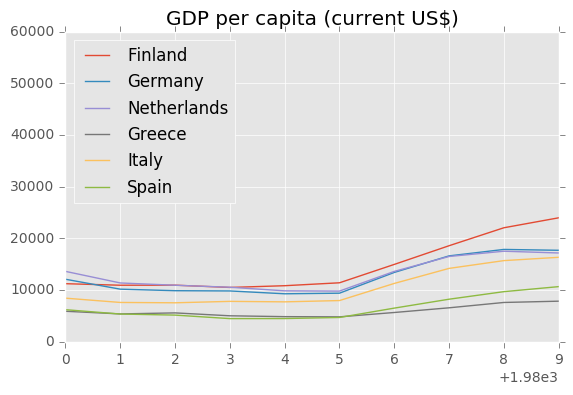

In [325]:
plot_indicator(chosen_indicators[0])
plt.xlim(1980, 1989)